In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt


3.413028512805852


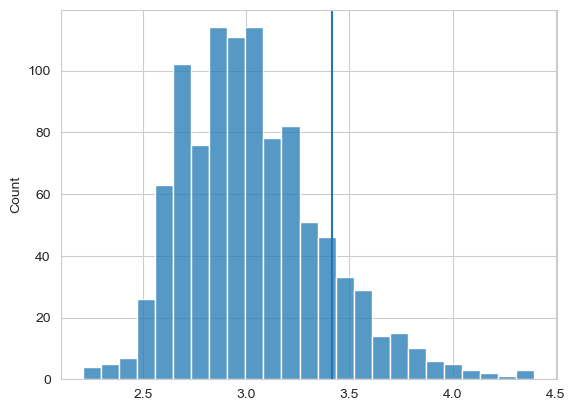

In [2]:
## Assuming binary dataset with sensitivity d log n / n

d = 20 # num dims
p = 0.01 # zCDP
n = 1000 # num samples
mu  = 0.0001
# 0.1 bound
# probabilty to stay outside the bound of a max error.
## With probability 1 - m, error is not larger as the bound
numDS = 1000
values = np.random.normal(0, (d**2 * np.log(n)**2) / (2 * p * n**2), size=(numDS, d*d))
a = [max(abs(x), key=abs) for x in values] # max error

# printing max error per round

plt = sb.histplot(a)
sigma = (d * np.log(n) / n / np.sqrt(2 * p))
threshold =  (sigma) * np.sqrt(np.log(d / mu))
print(threshold)

plt.axvline(x = threshold,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
#plt.axvline(x = -threshold,    # Line on x = 2
#            ymin = 0, # Bottom of the plot
#            ymax = 1) # Top of the plot


In [3]:
import sys

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):

        min = sys.maxsize

        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index

    def primMST(self):

        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1  # First node is always the root of

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)

            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):

                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False \
                        and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        self.printMST(parent)

In [43]:
# Load Data
dataset=pd.read_csv("./datasets/Surgical-deepnet.csv", header=0, usecols=[3,6,7,8,9,10,11,17,24], index_col=0)
print(dataset)
# dataset['index_col'] = dataset.index


dataset = dataset.reset_index()
keys = {c: i for i, c in enumerate(dataset.columns)}
dataset = dataset.to_numpy()

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

n = dataset.shape[1]
mutualInformation = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(n):
        mutualInformation[ix,jx]= calc_MI(dataset[:, ix], dataset[:, jx], 10)

                 baseline_dementia  baseline_diabetes  baseline_digestive  \
baseline_cancer                                                             
1                                0                  0                   0   
0                                0                  0                   0   
0                                0                  0                   0   
0                                0                  1                   1   
0                                0                  0                   0   
...                            ...                ...                 ...   
0                                0                  0                   0   
0                                0                  0                   0   
0                                0                  0                   0   
0                                0                  0                   1   
0                                0                  0                   1   

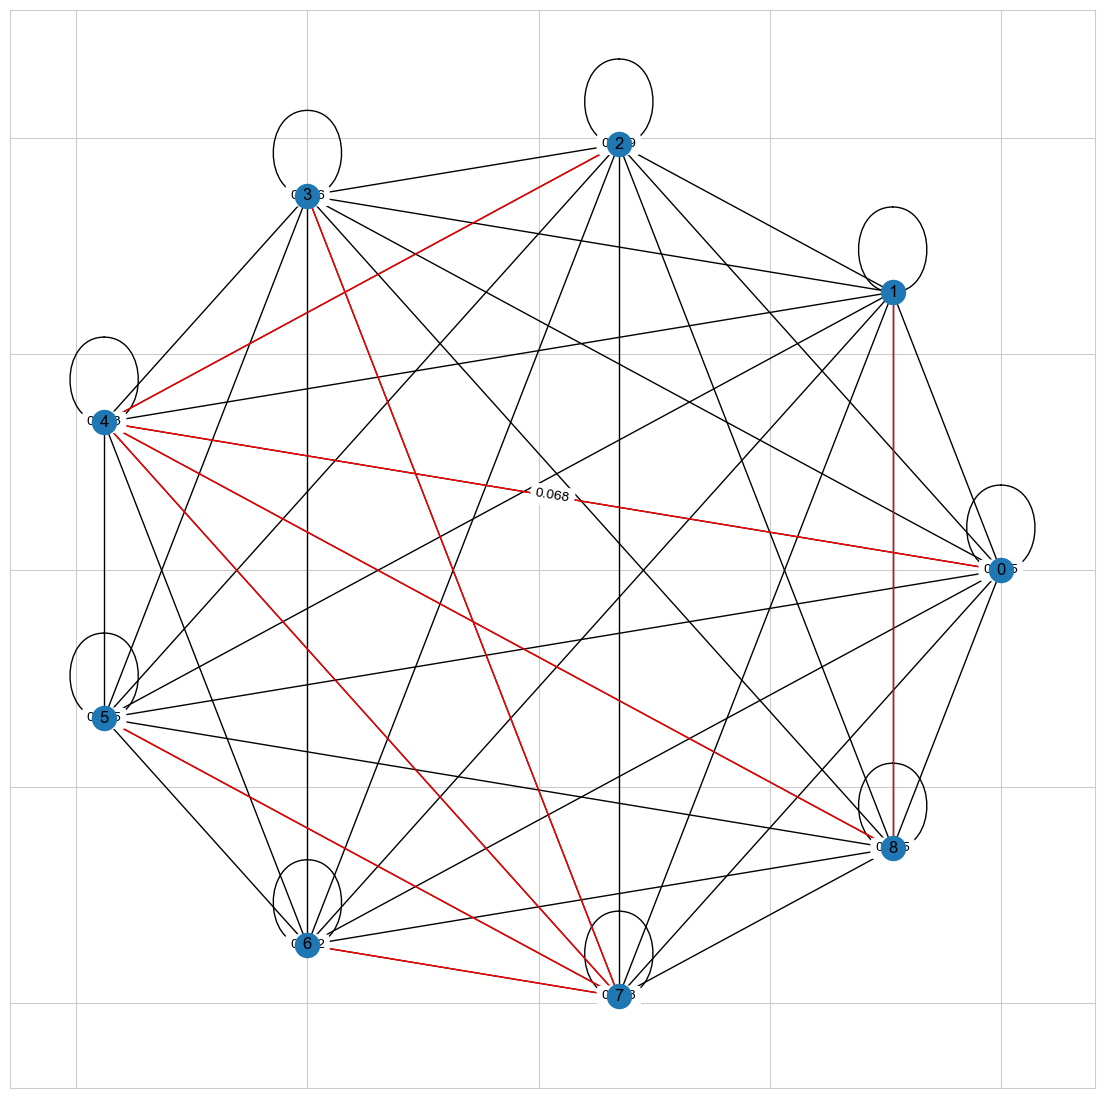

In [44]:
import networkx as nx

def format_edges(weight):
    if weight<0.05:
        return ""
    else:
        return f"{weight:.3f}"

## TODO Load MI and add gaussian noise

A = mutualInformation

G = nx.from_numpy_array(A)
G = nx.convert_node_labels_to_integers(G)
T=nx.maximum_spanning_tree(G)

plt.figure(3,figsize=(14,14))
pos = nx.circular_layout(G, scale=40)  # positions for all nodes - seed for reproducibility

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(T, pos, edge_color="red")
nx.draw_networkx_labels(G, pos)
# edge weight labels
edge_labels = dict([((u,v,), format_edges(d['weight'])) for u,v,d in G.edges(data=True)])

nx.draw_networkx_edge_labels(G, pos, edge_labels)
# larger figure size
plt.show()


